In [1]:
# setup

from mlwpy import *
%matplotlib inline

iris = datasets.load_iris()

# standard iris dataset
tts = skms.train_test_split(iris.data, iris.target,
                            test_size=.33, random_state=21)

(iris_train_ftrs, iris_test_ftrs,
iris_train_tgt, iris_test_tgt) = tts

# one-class variation
useclass = 1
tts_1c = skms.train_test_split(iris.data, iris.target,
                               test_size=.33, random_state=21)

(iris_1c_train_ftrs, iris_1c_test_ftrs,
iris_1c_train_tgt, iris_1c_test_tgt) = tts_1c



### 8.2.1 Tree-Building Algorithms

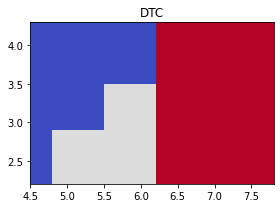

In [2]:
tree_classifiers = {
    'DTC' : tree.DecisionTreeClassifier(max_depth=3)
}

fig, ax = plt.subplots(1, 1, figsize=(4,3))
for name, mod in tree_classifiers.items():
    #plot_boundary only uses specified columns
    #[0,1] [sepal len/width] to predict and graph
    plot_boundary(ax, iris.data, iris.target, mod, [0,1])
    ax.set_title(name)
    
plt.tight_layout()

### 8.2.2 Decison Tree

In [3]:
dtc = tree.DecisionTreeClassifier()
skms.cross_val_score(dtc, 
                     iris.data, iris.target,
                     cv=3, scoring='accuracy')

array([0.98, 0.94, 0.98])

In [4]:
iris_1c_tree = (tree.DecisionTreeClassifier()
                    .fit(iris_1c_train_ftrs, iris_1c_train_tgt))

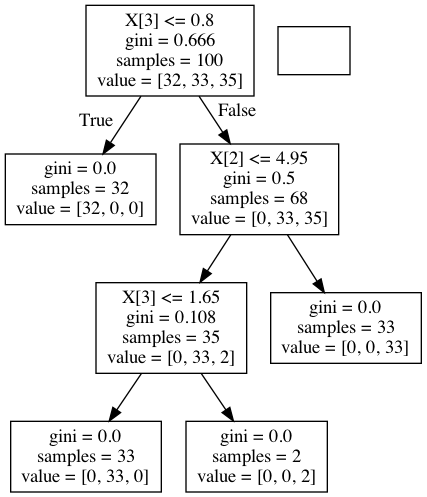

In [5]:
#viewing tree with pydotplus
import pydotplus
dot_data = tree.export_graphviz(iris_1c_tree, out_file=None)
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png("outputs/iris_1c.png")
Image("outputs/iris_1c.png", width=575, height=575)

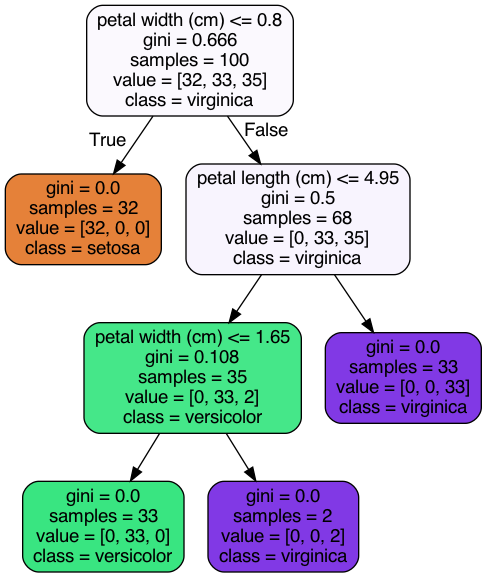

In [6]:
#viewing tree with .dot file

iris_tree = (tree.DecisionTreeClassifier()
                    .fit(iris_train_ftrs, iris_train_tgt))

with open("outputs/iris.dot", 'w') as f:
    dot_data = tree.export_graphviz(iris_tree, out_file=f,
                                    feature_names=iris.feature_names,
                                    class_names=iris.target_names,
                                    filled=True, rounded=True)
#'!' shell commands
!dot -Tpng outputs/iris.dot -o outputs/iris.png
!rm outputs/iris.dot

Image("outputs/iris.png", width=575, height=575)

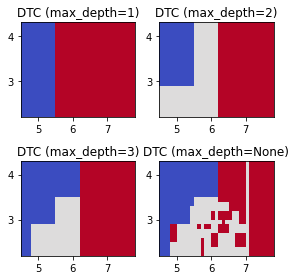

In [7]:
fig, axes = plt.subplots(2,2,figsize=(4,4))

depths = [1, 2, 3, None]
for depth, ax in zip(depths, axes.flat):
    dtc_model = tree.DecisionTreeClassifier(max_depth=depth)
    #only predicting with sepal length and width
    plot_boundary(ax, iris.data, iris.target, dtc_model, [0,1])
    ax.set_title("DTC (max_depth={})".format(dtc_model.max_depth))
    
plt.tight_layout()

#max_depth=None overfitting

## 8.3 Support Vector Classifiers

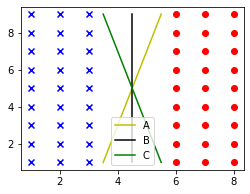

In [8]:
fig, ax = plt.subplots(1,1, figsize=(4,3))

#create cross product of points
left = np.mgrid[1:4.0, 1:10].reshape(2, -1).T
right = np.mgrid[6:9.0, 1:10].reshape(2, -1).T

#data points
ax.scatter(left[:,0], left[:,1], c='b', marker='x')
ax.scatter(right[:,0], right[:,1], c='r', marker='o')

#separating lines
ax.plot([3.5, 5.5], [1,9], 'y', label='A')
ax.plot([4.5, 4.5], [1,9], 'k', label='B')
ax.plot([3.5, 5.5], [9,1], 'g', label='C')
ax.legend(loc='lower center');

# b line is the maximum margin separator

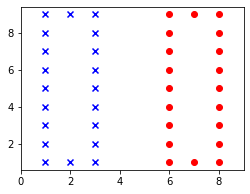

In [9]:
#boundaries of the two classes

fig, ax = plt.subplots(1, 1, figsize=(4,3))

# create cross-product of points
left = np.mgrid[1:4:2, 1:10].reshape(2, -1).T
right = np.mgrid[6:9:2, 1:10].reshape(2, -1).T

ax.scatter(left[:,0], left[:,1], c='b', marker='x')
ax.scatter([2,2], [1,9], c='b', marker='x')
ax.scatter(right[:,0], right[:,1], c='r', marker='o')
ax.scatter([7,7], [1,9], c='r', marker='o')
ax.set_xlim(0,9);

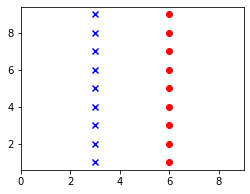

In [10]:
#really we only care about the boundaries that oppose the other class
#support vectors

fig, ax = plt.subplots(1,1, figsize=(4,3))

left = np.mgrid[3:4, 1:10].reshape(2, -1).T
right = np.mgrid[6:7, 1:10].reshape(2, -1).T

ax.scatter(left[:,0], left[:,1], c='b', marker='x')
ax.scatter(right[:,0], right[:,1], c='r', marker='o')
ax.set_xlim(0,9);

In [11]:
sv_classifiers = {"SVC(Linear)" : svm.SVC(kernel='linear'),
                  "NuSVC(Linear)" : svm.NuSVC(kernel='linear', nu=.9)}

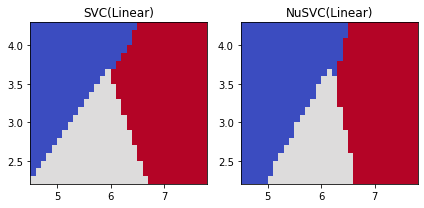

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(6,3))
for (name, mod), ax in zip(sv_classifiers.items(), axes.flat):
    plot_boundary(ax, iris.data, iris.target, mod, [0,1])
    ax.set_title(name)
    
plt.tight_layout()

### 8.3.1.2 Parameters for SVCs

In [13]:
def do_linear_svc_separators(svc_maker, pname, params, ax):
    'create svc(params) and draw separation boundary'
    xys = (np.linspace(2, 8, 100),
           np.linspace(2, 8, 100))
    
    for p in params:
        kwargs = {pname:p, 'kernel':'linear'}
        svc = svc_maker(**kwargs).fit(ftrs, tgt)
        plot_separator(svc, *xys,
                       '{}={:g}'.format(pname, p), ax=ax)

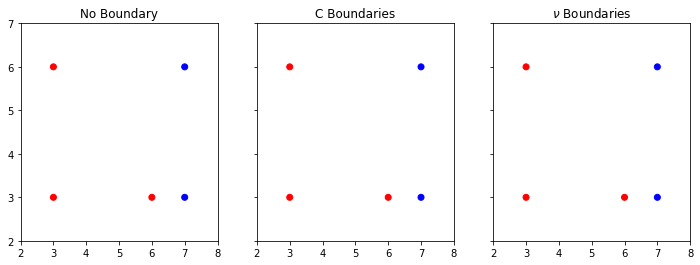

In [14]:
ftrs = np.array([[3,3],
                 [3,6],
                 [7,3],
                 [7,6],
                 [6,3]])

tgt = np.array([0,0,1,1,0])
colors = np.array(['r', 'b'])

Cs = [.1, 1.0, 10]
nus = [.3, .4, .5]

fig, axes = plt.subplots(1,3,figsize=(12,4),
                         sharex=True, sharey=True)

for ax in axes:
    ax.scatter(ftrs[:,0], ftrs[:,1], c=colors[tgt])
ax.set_xlim(2,8); ax.set_ylim(2,7)

do_linear_svc_separators(svm.SVC, "C", Cs, axes[1])
do_linear_svc_separators(svm.NuSVC, "nu", nus, axes[2])

axes[0].set_title("No Boundary")
axes[1].set_title("C Boundaries")
axes[2].set_title(r"$\nu$ Boundaries");

